This notebook was developed as a starting point in the analysis of the results of the bathymetry and bottomfriction calibration. Let us start my importing some modules

In [1]:
import os
import sys
sys.path.append('/u/vasulkar/p_emodnet_amey/Regional_canada_model/')
path1=sys.path[-1]
print(path1)
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 

/u/vasulkar/p_emodnet_amey/Regional_canada_model/


Now, the first step is to plot the cost function graph.

In [2]:
runsfolder=os.path.join(path1,'model_runs','snellius_runs','OpenDAruns')
print(runsfolder)
simfolder=runsfolder+'/Canadamodel_3.1.1/'
optmodelfolder=simfolder+'stochModel/work24/'
# paramfile=optmodelfolder+'horizontaleddy_correction_template_30.xyz'

/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/snellius_runs/OpenDAruns


In [58]:
import pandas as pd

# simfolder=runsfolder+'/vis_9para_32TG_model/'
resfile=simfolder+'results_dud.csv'
df=pd.read_csv(resfile,delimiter='\t',quotechar="'")
df.head()

,Iteration Cost,bf_1,bf_2,bf_3,bf_4,bf_5,bf_6,bf_7,bf_8,bf_9,bf_10,bf_11,bf_12,bf_13,bf_14
1,2.817579e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.817842e+07,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.821434e+07,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.854070e+07,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.803908e+07,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
key=df.keys()
costfuncvec=df[key[0]]
index=np.linspace(0,len(costfuncvec),len(costfuncvec)+1)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme("notebook") 
plt.plot(index[:-3],costfuncvec[:-2])
plt.xlabel('Iterations')
plt.ylabel('Cost function value')
# fname=os.path.join(path1,'postprocessing','calibration','figures','CF_2.jpg')
# plt.savefig(fname,dpi=300)

NameError: name 'index' is not defined

Now we compute the RMS errors betweeen TG data o/p and the optimized model. And compare that to the standard model with GTSM previous calibration and also compare to FES output. 

In [4]:
import xarray as xr
from postprocessing import readdata, tideanalysis

In [105]:
#below is to get data from one year file.
# import xarray as xr
# from postprocessing import readdata, tideanalysis
# #%% reading FES data on tide gauges 
# # # reading FES data.
# festgfile=os.path.join(path1,'FESCanada','CHSTG_snapped_model_obs_allyear.nc')  #with 154 regional model obs
# # festgfile=os.path.join(path1,'FESCanada','CHSTG.nc') 
# festgdata=xr.open_dataset(festgfile)
# data={}
# hmat=np.array(festgdata['tide'])[34992:39313,:]
# time=np.array(festgdata['time'])[34992:39313]  #for september
# slon=np.array(festgdata['lon'])
# slat=np.array(festgdata['lat'])
# stations=np.array(festgdata['station_id'])

# for i in range(len(festgdata['lon'])):
#     if i==0:
#         h=hmat[:,i]
#         s=pd.Series(h,index=time)
#         hresamp=s.resample('15min').interpolate()
#         timresamp=np.array(hresamp.index.values)
#         hresamp=np.array([hresamp.values])
#         hresampmat=hresamp
#     else:
#         h=hmat[:,i]
#         s=pd.Series(h,index=time)
#         hresamp=s.resample('15min').interpolate()
#         timresamp=np.array(hresamp.index.values)
#         hresamp=np.array([hresamp.values])
#         hresampmat=np.vstack((hresampmat,hresamp))
      
# ds=xr.Dataset({'H':(('time','stations'),hresampmat.T),'lon':(('stations'),slon),'lat':(('stations'),slat)},
#                 coords={'stations':stations,
#                         'time':timresamp})
# fname=os.path.join('ncdata','FESTG15min.nc')
# ds.to_netcdf(fname)


Now we read the standard runs from standard annual run folder. 

In [144]:
# locindex=(406+np.linspace(0,742,743)).astype(int)
locindex=(1149+np.linspace(0,153,154)).astype(int)
hisfileloc=os.path.join(path1,'model_runs','cartesius_runs', 'annualruns','standardruns')
hisfile=os.path.join(hisfileloc,'canada_model_his_201309.nc')
modelsepdata=readdata.readmodel(hisfile,locindex)

hmat=np.array(modelsepdata['h'])[:,:]
time=np.array(modelsepdata['time'])[:]  #for september
slon=np.array(modelsepdata['lon'])
slat=np.array(modelsepdata['lat'])
stations=np.array(modelsepdata['station'])

for i in range(len(modelsepdata['lon'])):
    if i==0:
        h=hmat[:,i]
        s=pd.Series(h,index=time)
        hresamp=s.resample('15min').interpolate()
        timresamp=np.array(hresamp.index.values)
        hresamp=np.array([hresamp.values])
        hresampmat=hresamp
    else:
        h=hmat[:,i]
        s=pd.Series(h,index=time)
        hresamp=s.resample('15min').interpolate()
        timresamp=np.array(hresamp.index.values)
        hresamp=np.array([hresamp.values])
        hresampmat=np.vstack((hresampmat,hresamp))
      
ds=xr.Dataset({'H':(('time','stations'),hresampmat.T),'lon':(('stations'),slon),'lat':(('stations'),slat)},
                coords={'stations':stations,
                        'time':timresamp})
fname=os.path.join('ncdata','GTSMTG15min.nc')
ds.to_netcdf(fname)


Model data reading done.


We read the optimized model output.

In [62]:
optmodopfile=optmodelfolder+'output/canada_model_0000_his.nc'
optmoddata=xr.open_dataset(optmodopfile)

Now after resampling we do the comparison of all the datasets.

In [16]:
tstafile='/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_development/Openda_models/snelliusmodels/Canadamodel_1/stochModel/input_model/TGObs_Sep.xyn' #file which has obs on wet cells in canada model.
headerlist=["Lon","Lat","Name"]
df=pd.read_csv(tstafile,delim_whitespace=True,names=headerlist,quotechar="'")
tstaposdata=np.vstack((df['Lon'],df['Lat'])).T
tstanamdata=np.array(df['Name'])


In [17]:
#TG obs from the obs folder.
obsfolder=os.path.join(path1,'model_development','Openda_models','Observations','CHSTG','Sept_All')
files=os.listdir(obsfolder)
headerlist=["Time","Waterlevel"]
for i in range(len(tstanamdata)):
    tgfile=obsfolder+'/'+tstanamdata[i]+'.wl'
    if i==0:
        dftg=pd.read_csv(tgfile,delim_whitespace=True,names=headerlist,skiprows=1)
        hmattg=dftg['Waterlevel']
    else:
        dftg=pd.read_csv(tgfile,delim_whitespace=True,names=headerlist,skiprows=1)
        hmattg=np.vstack((hmattg,dftg['Waterlevel']))


Now let's compute RMS for all TG.

In [63]:
import math
def rmscompute(hobs,hmod):
    #first remove the mean from hobs.
    hobsmean=hobs-hobs.mean()
    MSE = np.square(np.subtract(hobsmean,hmod)).mean() 
    RMSE = math.sqrt(MSE)
    return(RMSE)

def getrmsdata(hobsmat,hmodmat):
    nstations=154
    rmsevec=[]
    for i in range(154):
        RMSE=rmscompute(hobsmat[i,:],hmodmat[i,:])
        rmsevec=np.append(rmsevec,RMSE)
    return(rmsevec)


In [64]:
#comparison of different dataset.
#station data
Lon=df['Lon']
Lat=df['Lat']
#time data
time=optmoddata['time']


KeyError: 'Lon'

In [20]:
#Fes data
#fesdata=xr.open_dataset(os.path.join('ncdata','FESTG15min.nc'))  #after resampling
fesdata=xr.open_dataset('/u/vasulkar/p_emodnet_amey/Regional_canada_model/FESCanada/CHSTG_snapped_model_obs_09Sep.nc')
hfes=fesdata['tide']
fesrmsevec=getrmsdata(hmattg,hfes.T)

In [21]:
#gtsm data
gtsmdata=xr.open_dataset(os.path.join('ncdata','GTSMTG15min.nc'))
hgtsm=gtsmdata['H']
gtsmrmsevec=getrmsdata(hmattg,hgtsm.T)

In [ ]:
#can opt model
hoptmodel=optmoddata['waterlevel'][1:,:]
canoptrmsevec=getrmsdata(hmattg,hoptmodel.T)

Plot RMSE comparison.

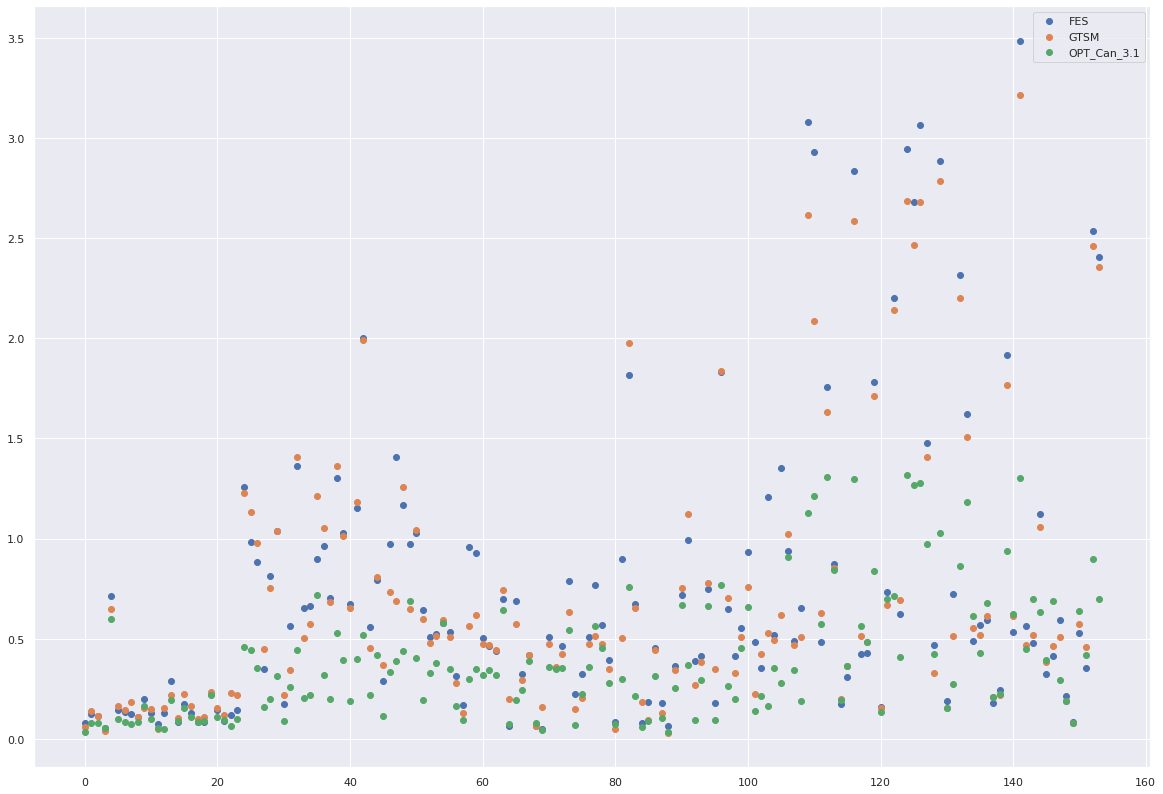

In [ ]:
fig=plt.figure(figsize=(20, 14), frameon=True)
plt.scatter(np.arange(0,len(fesrmsevec),1),fesrmsevec,label='FES')
plt.scatter(np.arange(0,len(gtsmrmsevec),1),gtsmrmsevec,label='GTSM')
plt.scatter(np.arange(0,len(gtsmrmsevec),1),canoptrmsevec,label='OPT_Can_3.1.1')
plt.legend()

/tmp/ipykernel_6555/3559385497.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)


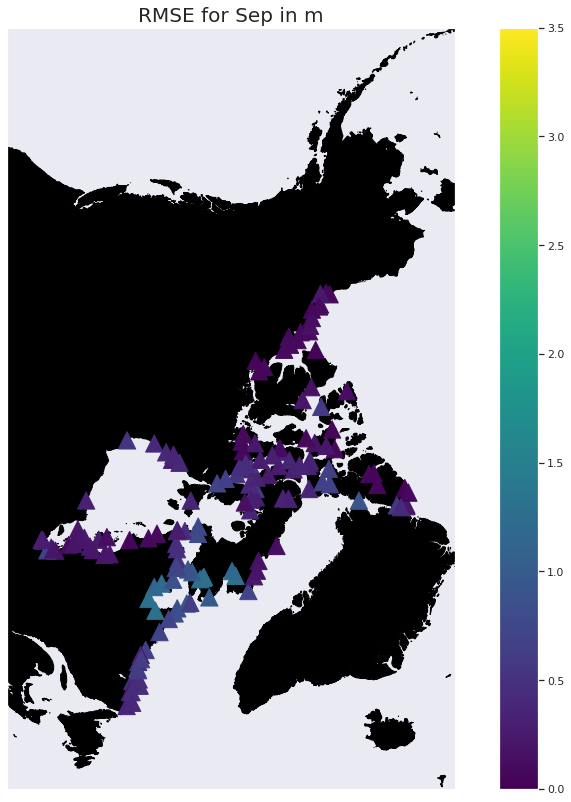

In [ ]:

   
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())

feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
scatter_opts = {'marker':'^','s':300,'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1,'vmin':0.0,'vmax':3.5}
cont=ax1.scatter(Lon,Lat,c=canoptrmsevec,**scatter_opts)
cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)
# plt.show()
plt.title('RMSE for Sep in m', fontsize=20)
fname=os.path.join(path1,'postprocessing','calibration','figures','optcan_3.1.1.jpg')
fig.savefig(fname,dpi=300)


Now we plot the value of the parameterts. let us start with bottom friction.


In [67]:
paramfile=optmodelfolder+'bf_correction_14.xyz'
print(paramfile)
tempparafile=optmodelfolder+'bf_correction_template_14.xyz'
plon=np.loadtxt(paramfile,usecols=0)
plat=np.loadtxt(paramfile,usecols=1)
param=np.loadtxt(paramfile,usecols=2) 
tempparam=np.loadtxt(tempparafile,usecols=2)
#param change from param value
paramvalue=62.5*param


/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/snellius_runs/OpenDAruns/Canadamodel_3.1.1/stochModel/work24/bf_correction_14.xyz


/tmp/ipykernel_6555/2364989872.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)


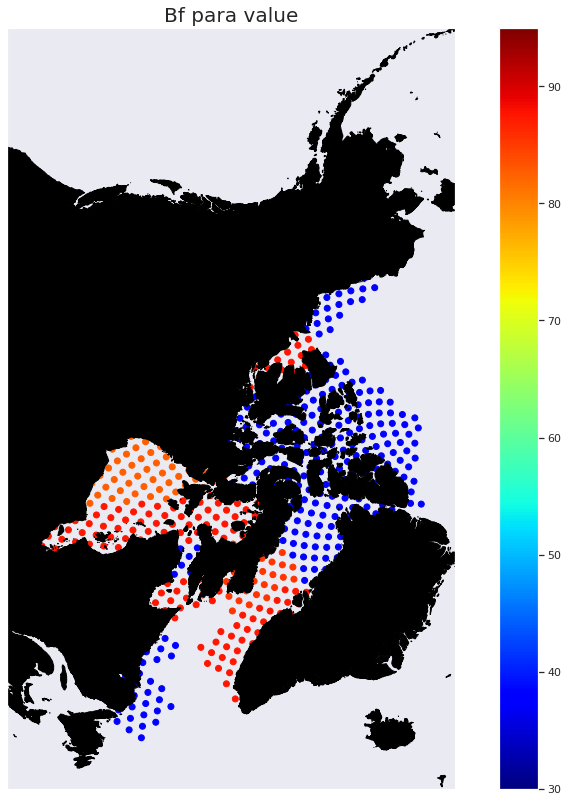

In [68]:
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())

scatter_opts = {'marker':'o','cmap':'jet','transform':ccrs.PlateCarree(),'alpha':1,'vmin':30,'vmax':95}
cont=ax1.scatter(plon,plat,c=paramvalue,**scatter_opts)
cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)
# plt.show()

feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
plt.title('Bf para value', fontsize=20)
fname=os.path.join(path1,'postprocessing','calibration','figures','bfval_3.1.1.jpg')
fig.savefig(fname,dpi=300)


/tmp/ipykernel_6555/1677532013.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)


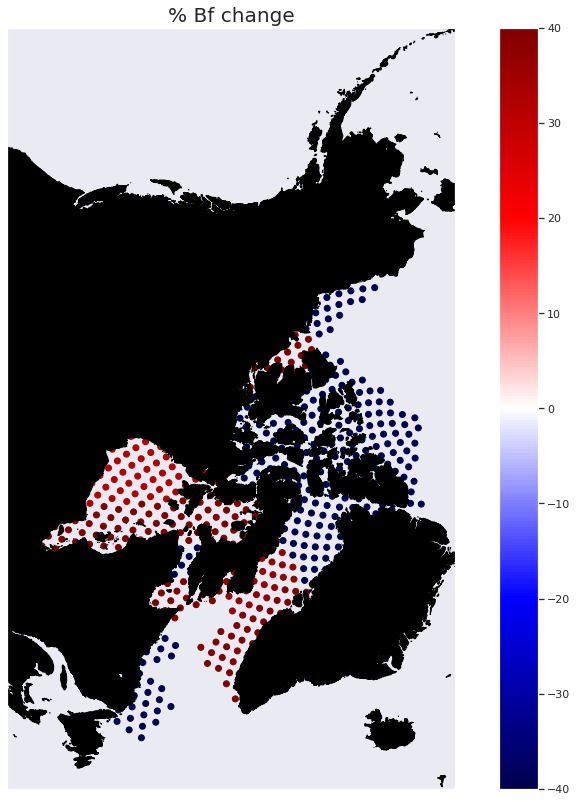

In [69]:
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())

scatter_opts = {'marker':'o','cmap':'seismic','transform':ccrs.PlateCarree(),'alpha':1,'vmin':-40,'vmax':40}
cont=ax1.scatter(plon,plat,c=(param-1.0)*100.0,**scatter_opts)
cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)
# plt.show()

feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
plt.title('% Bf change', fontsize=20)
fname=os.path.join(path1,'postprocessing','calibration','figures','bfchange_3.1.1.jpg')
fig.savefig(fname,dpi=300)

In [70]:
paramfile=optmodelfolder+'bathy_correction_20.xyz'
print(paramfile)
tempparafile=optmodelfolder+'bathy_correction_template_20.xyz'
plon=np.loadtxt(paramfile,usecols=0)
plat=np.loadtxt(paramfile,usecols=1)
param=np.loadtxt(paramfile,usecols=2) 
tempparam=np.loadtxt(tempparafile,usecols=2)
#bathy %change
paramvalue=(param-1)*100.


/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/snellius_runs/OpenDAruns/Canadamodel_3.1.1/stochModel/work24/bathy_correction_20.xyz


/tmp/ipykernel_6555/1411952268.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)


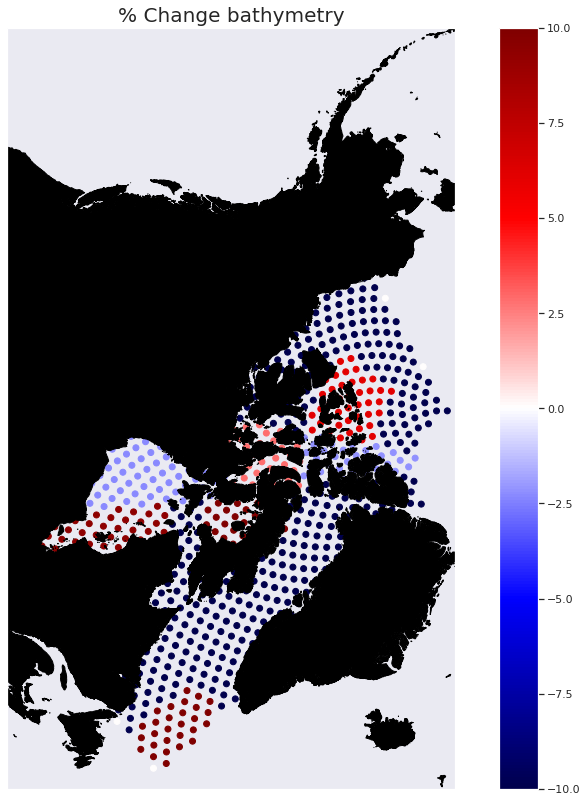

In [72]:
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())


scatter_opts = {'marker':'o','cmap':'seismic','transform':ccrs.PlateCarree(),'alpha':1,'vmin':-10.0,'vmax':10.0}
cont=ax1.scatter(plon,plat,c=paramvalue,**scatter_opts)
cbar=fig.colorbar(cont,fraction=0.078, pad=0.04)
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
# plt.show()
plt.title('% Change bathymetry', fontsize=20)
fname=os.path.join(path1,'postprocessing','calibration','figures','bathycorr_3.1.1.jpg')
fig.savefig(fname,dpi=300)

Plot the bathymetry from gtsm v4.1 and gtsm v5.0 gebco 2021 qand geb2019. 

In [5]:
#getting the bathymetry from the model net file.
netfilev4=optmodelfolder+'gtsm__canada_2_net.nc'
netdatav4=xr.open_dataset(netfilev4)
bathymetv4=netdatav4.NetNode_z.values
netxv4=netdatav4.NetNode_x.values
netyv4=netdatav4.NetNode_y.values
triangv4=readdata.gettriangulation(netxv4,netyv4)

/tmp/ipykernel_6555/3155757038.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cont)


Text(0.5, 1.0, 'Bathymetry')

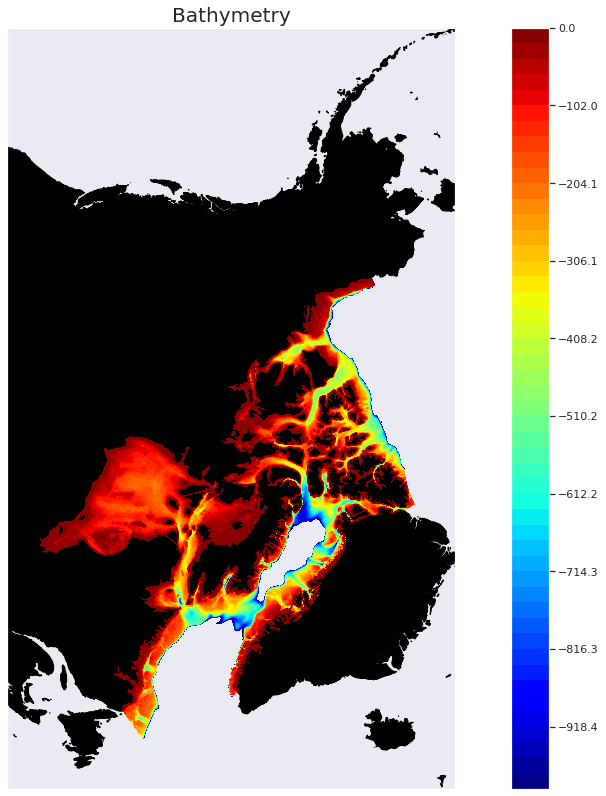

In [33]:
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())

feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
contour_opts = {'levels': np.linspace(-1000,0,50),
                'cmap':'jet','transform':ccrs.PlateCarree()}
cont=ax1.tricontourf(triangv4,bathymetv4,**contour_opts)
fig.colorbar(cont)

plt.title('Bathymetry', fontsize=20)
# fname=os.path.join(path1,'postprocessing','calibration','figures','bathymetry.jpg')
# fig.savefig(fname,dpi=300)


In [6]:
#getting the bathymetry from the model net file.
netfilev5='/u/vasulkar/p_emodnet_amey/Regional_canada_model/bathymetry_checks/GTSM_v5_bathymetry/gtsm_200s_2000m_eu0900m_ca2000m_v4_net.nc'
netdatav5=xr.open_dataset(netfilev5)
bathymetv5=netdatav5.NetNode_z.values
netxv5=netdatav5.NetNode_x.values
netyv5=netdatav5.NetNode_y.values
triangv5=readdata.gettriangulation(netxv5,netyv5)

In [7]:
from scipy.interpolate import griddata 
interpbathyv5=griddata((netxv5,netyv5),bathymetv5,(netxv4,netyv4))


/tmp/ipykernel_6555/3926128114.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cont)


Text(0.5, 1.0, 'Bathymetry')

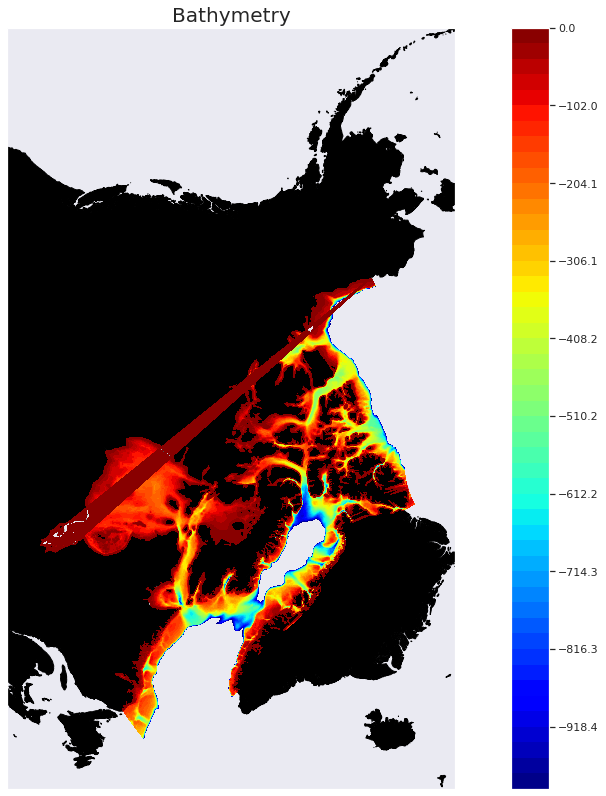

In [36]:
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())

feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
contour_opts = {'levels': np.linspace(-1000,0,50),
                'cmap':'jet','transform':ccrs.PlateCarree()}
cont=ax1.tricontourf(triangv4,interpbathyv5,**contour_opts)
fig.colorbar(cont)

plt.title('Bathymetry', fontsize=20)
# fname=os.path.join(path1,'postprocessing','calibration','figures','bathymetry.jpg')
# fig.savefig(fname,dpi=300)

In [50]:
diffbathy=-bathymetv4+interpbathyv5
perdiffbathy=(diffbathy/bathymetv4)*100

/tmp/ipykernel_6555/2403656948.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cont)


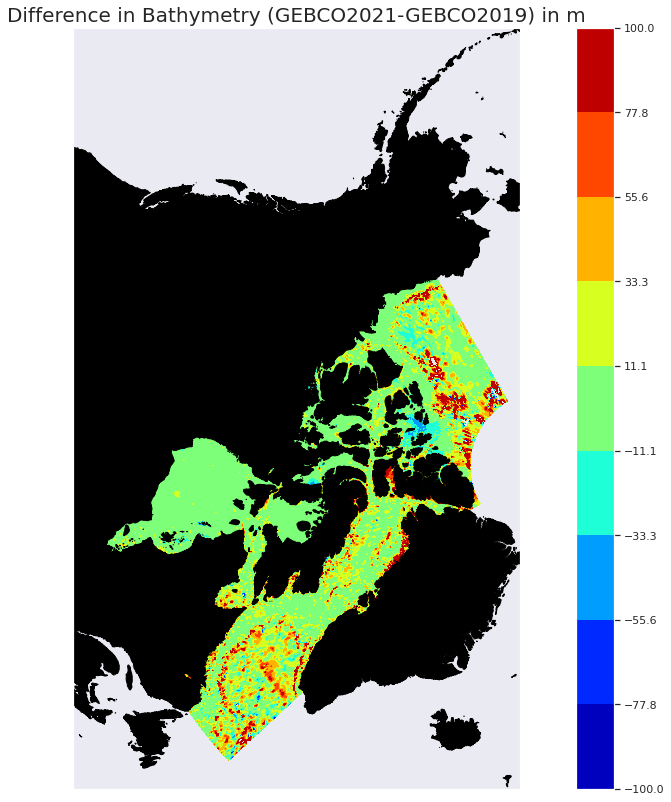

In [56]:
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())


contour_opts = {'levels': np.linspace(-100,100,10),
                'cmap':'jet','transform':ccrs.PlateCarree()}
cont=ax1.tricontourf(triangv4,diffbathy,**contour_opts)
fig.colorbar(cont)
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
plt.title('Difference in Bathymetry (GEBCO2021-GEBCO2019) in m', fontsize=20)
# fname=os.path.join(path1,'postprocessing','calibration','figures','diff_bathymetry_19-21.jpg')
# fig.savefig(fname,dpi=300)

/tmp/ipykernel_6555/4034642473.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cont)


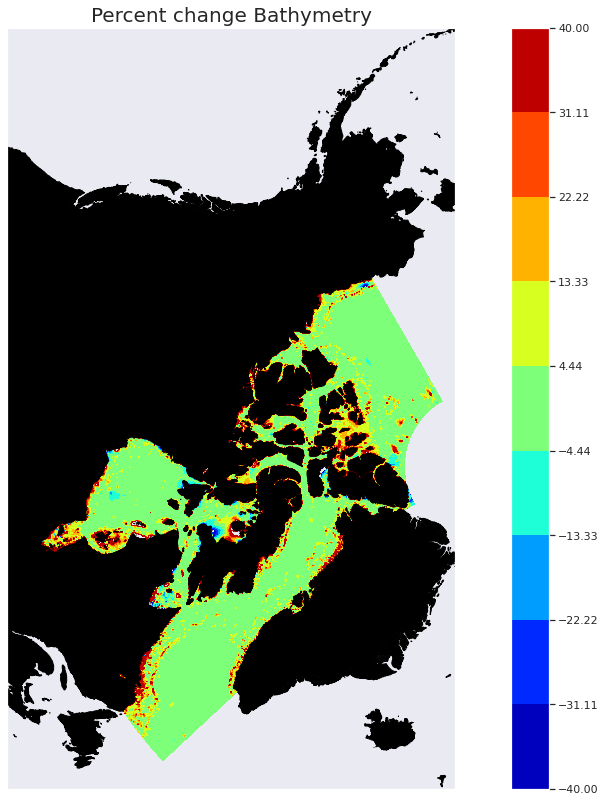

In [55]:
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())


contour_opts = {'levels': np.linspace(-40,40,10),
                'cmap':'jet','transform':ccrs.PlateCarree()}
cont=ax1.tricontourf(triangv4,perdiffbathy,**contour_opts)
fig.colorbar(cont)
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
plt.title('Percent change Bathymetry', fontsize=20)
# fname=os.path.join(path1,'postprocessing','calibration','figures','percentdiff_bathymetry_19-21.jpg')
# fig.savefig(fname,dpi=300)

In [6]:
#reading the new gebco2021 in to our canada grid.
#getting the bathymetry from the model net file.
newnetfilev4='/u/vasulkar/p_emodnet_amey/Regional_canada_model/model_runs/h_6/gebco2021_run/DFM_interpreted_network_canada_model_dummy_net.nc'
newnetdatav4=xr.open_dataset(newnetfilev4)
newbathymetv4=newnetdatav4.NetNode_z.values
newnetxv4=newnetdatav4.NetNode_x.values
newnetyv4=newnetdatav4.NetNode_y.values
triangv4=readdata.gettriangulation(newnetxv4,newnetyv4)

In [8]:
diffbathy1=-bathymetv4+newbathymetv4
perdiffbathy1=(diffbathy1/bathymetv4)*100
# diffbathy2=-newbathymetv4+interpbathyv5
# perdiffbathy2=(diffbathy2/newbathymetv4)*100

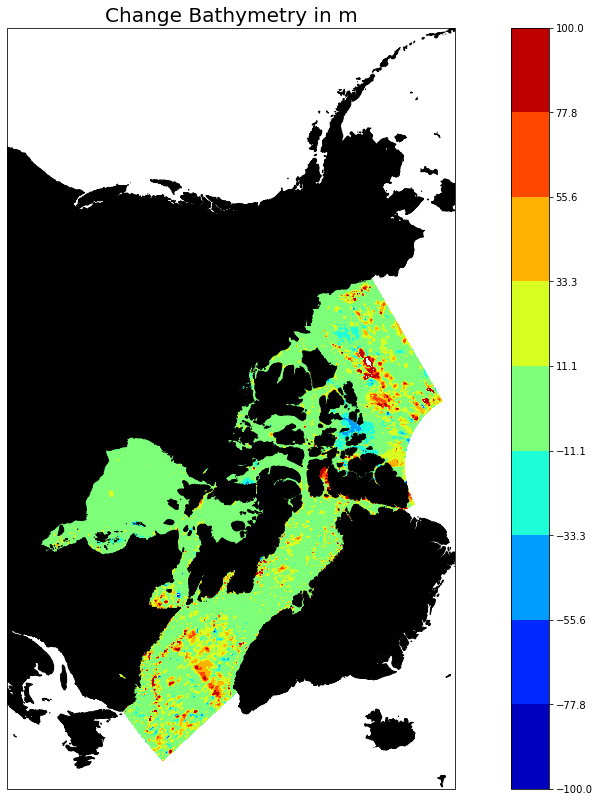

In [10]:
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())


contour_opts = {'levels': np.linspace(-100,100,10),
                'cmap':'jet','transform':ccrs.PlateCarree()}
cont=ax1.tricontourf(triangv4,diffbathy1,**contour_opts)
fig.colorbar(cont)
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
plt.title('Change Bathymetry in m', fontsize=20)
fname=os.path.join(path1,'postprocessing','calibration','figures','diff_bathymetry_19-21_dflow.jpg')
fig.savefig(fname,dpi=300)

/tmp/ipykernel_22927/1595094546.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cont)


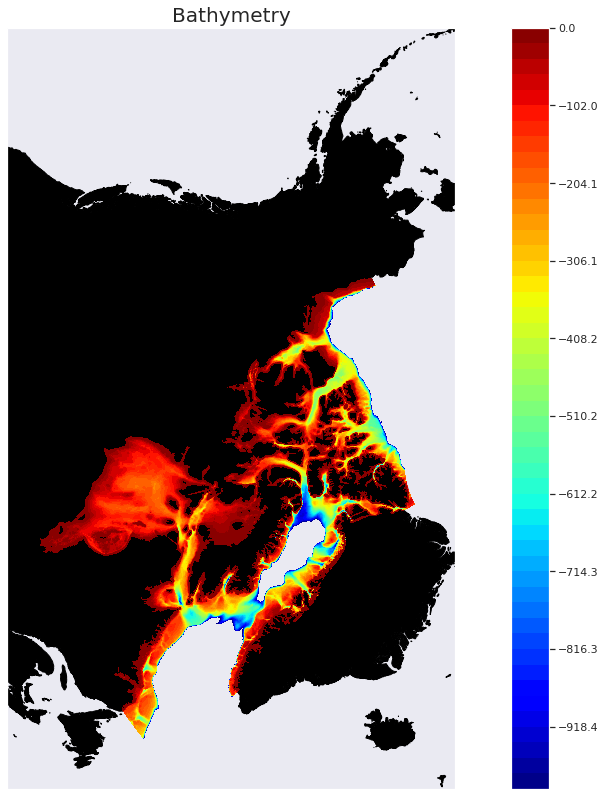

In [15]:
fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())

feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
contour_opts = {'levels': np.linspace(-1000,0,50),
                'cmap':'jet','transform':ccrs.PlateCarree()}
cont=ax1.tricontourf(triangv4,newbathymetv4,**contour_opts)
fig.colorbar(cont)

plt.title('Bathymetry', fontsize=20)
fname=os.path.join(path1,'postprocessing','calibration','figures','bathymetry_21.jpg')
fig.savefig(fname,dpi=300)

Comparison between two approaches.